In [372]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [373]:
df = pd.read_csv('Leads.csv')

In [374]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [375]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [376]:
#We will replace the space in column names with "_" and make all of them in lowercase
df.columns = [col.replace(' ','_').lower() for col in df.columns]

In [377]:
df.head()

,prospect_id,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,last_activity,country,specialization,how_did_you_hear_about_x_education,what_is_your_current_occupation,what_matters_most_to_you_in_choosing_a_course,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,receive_more_updates_about_our_courses,tags,lead_quality,update_me_on_supply_chain_content,get_updates_on_dm_content,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score,i_agree_to_pay_the_amount_through_cheque,a_free_copy_of_mastering_the_interview,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [378]:
#Exploring the Data
#Shape of data
df.shape


(9240, 37)

In [379]:
df.isnull().sum()*100/df.shape[0]

prospect_id                                       0.000000
lead_number                                       0.000000
lead_origin                                       0.000000
lead_source                                       0.389610
do_not_email                                      0.000000
do_not_call                                       0.000000
converted                                         0.000000
totalvisits                                       1.482684
total_time_spent_on_website                       0.000000
page_views_per_visit                              1.482684
last_activity                                     1.114719
country                                          26.634199
specialization                                   15.562771
how_did_you_hear_about_x_education               23.885281
what_is_your_current_occupation                  29.112554
what_matters_most_to_you_in_choosing_a_course    29.318182
search                                            0.0000

In [380]:
#Dropping columns with more than 40% null data
drop_cols = df.columns[df.isnull().sum()*100/df.shape[0] > 40]
df = df.drop(columns=drop_cols)
df.shape

(9240, 32)

In [381]:
#Percentage of Null values in data after dropping columns
df.isnull().sum()*100/df.shape[0]

prospect_id                                       0.000000
lead_number                                       0.000000
lead_origin                                       0.000000
lead_source                                       0.389610
do_not_email                                      0.000000
do_not_call                                       0.000000
converted                                         0.000000
totalvisits                                       1.482684
total_time_spent_on_website                       0.000000
page_views_per_visit                              1.482684
last_activity                                     1.114719
country                                          26.634199
specialization                                   15.562771
how_did_you_hear_about_x_education               23.885281
what_is_your_current_occupation                  29.112554
what_matters_most_to_you_in_choosing_a_course    29.318182
search                                            0.0000

In [382]:
#Analysis of columns having null values
#Analysing column "what_matters_most_to_you_in_choosing_a_course"
df.what_matters_most_to_you_in_choosing_a_course.value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: what_matters_most_to_you_in_choosing_a_course, dtype: int64

In [383]:
#for the columns "what_matters_most_to_you_in_choosing_a_course"we can fill nulls with value 'Other'
df.what_matters_most_to_you_in_choosing_a_course = df.what_matters_most_to_you_in_choosing_a_course.fillna('Others')

In [384]:
#Analysing column "what_is_your_current_occupation"
df.what_is_your_current_occupation.value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: what_is_your_current_occupation, dtype: int64

In [385]:
#for the column "what_is_your_current_occupation" we can fill nulls with value 'Unemployed'
df.what_is_your_current_occupation =df.what_is_your_current_occupation.fillna('Unemployed')

In [386]:
#Analyzing column "how_did_you_hear_about_x_education"
df.how_did_you_hear_about_x_education.value_counts(normalize=True)

Select                   0.717048
Online Search            0.114887
Word Of Mouth            0.049481
Student of SomeSchool    0.044078
Other                    0.026447
Multiple Sources         0.021612
Advertisements           0.009953
Social Media             0.009527
Email                    0.003697
SMS                      0.003270
Name: how_did_you_hear_about_x_education, dtype: float64

In [387]:
#for columns "how_did_you_hear_about_x_education" we can fill nulls with value 'Other' and replace 'Select' with 'Other'
df.how_did_you_hear_about_x_education = df.how_did_you_hear_about_x_education.replace('Select','Other').fillna('Other')


In [388]:
#Analyzing column "last_activity"
df.last_activity.value_counts(normalize=True)

Email Opened                    0.376163
SMS Sent                        0.300427
Olark Chat Conversation         0.106490
Page Visited on Website         0.070045
Converted to Lead               0.046843
Email Bounced                   0.035679
Email Link Clicked              0.029222
Form Submitted on Website       0.012696
Unreachable                     0.010178
Unsubscribed                    0.006676
Had a Phone Conversation        0.003283
Approached upfront              0.000985
View in browser link Clicked    0.000657
Email Received                  0.000219
Email Marked Spam               0.000219
Visited Booth in Tradeshow      0.000109
Resubscribed to emails          0.000109
Name: last_activity, dtype: float64

In [389]:
#for the column "last_activity" we can fill null with value "Unknown"
df.last_activity =df.last_activity.fillna('Unknown')

In [390]:
#Analyzing column 'lead_source'
df.lead_source.value_counts(normalize=True).head()

Google            0.311604
Direct Traffic    0.276293
Olark Chat        0.190678
Organic Search    0.125380
Reference         0.058018
Name: lead_source, dtype: float64

In [391]:
#for the columns "lead_source" we can fill nulls with value 'Unknown'
df.lead_source =df.lead_source.fillna('Unknown')

In [392]:
#Analyzing column "totalvisits"
df.totalvisits.describe([0.99,0.90])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
50%         3.000000
90%         7.000000
99%        17.000000
max       251.000000
Name: totalvisits, dtype: float64

In [393]:
#for the columns "totalvisits" we can fill null with median value
df.totalvisits = df.totalvisits.fillna(df.totalvisits.quantile(0.5))

In [394]:
#Analyzing column "page_views_per_visit"
df.page_views_per_visit.describe([0.99,0.90])

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
50%         2.000000
90%         5.000000
99%         9.000000
max        55.000000
Name: page_views_per_visit, dtype: float64

In [395]:
#for the columns "page_views_per_visit" we can fill nulls with median value
df.page_views_per_visit =df.page_views_per_visit.fillna(df.page_views_per_visit.quantile(0.5))

In [396]:
#Analyzing column "country"
df.country.value_counts(normalize=True).head()

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
Name: country, dtype: float64

In [397]:
#for the column "country" we can fill nulls with India as it is the highest ocurring country
df.country = df.country.fillna("India")

In [398]:
#Analyzing column "specialization"
df.specialization.value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: specialization, dtype: int64

In [399]:
#for the column "specialization" we can fill nulls with "unknown" and also replace "select" with "unknown"
df.specialization = df.specialization.replace('Select','Unknown').fillna('Unknown')

In [400]:
#Analyzing column "tags"
df.tags.value_counts(normalize=True).head()

Will revert after reading the email    0.351962
Ringing                                0.204349
Interested in other courses            0.087141
Already a student                      0.078988
Closed by Horizzon                     0.060812
Name: tags, dtype: float64

In [401]:
#for the column "tags" we can fill nulls with value "Unknown"
df.tags = df.tags.fillna('Unknown')

In [402]:
#Analyzing column "lead_profile"
df.lead_profile.value_counts(normalize=True).head()

Select                   0.634819
Potential Lead           0.246976
Other Leads              0.074567
Student of SomeSchool    0.036901
Lateral Student          0.003675
Name: lead_profile, dtype: float64

In [403]:
#for the column "lead_profile" we can fill null with Unknown and replace "select" with "unknown"
df.lead_profile = df.lead_profile.replace("Select","Unknown").fillna("Unknown")

In [404]:
#Analyzing column "city"
df.city.value_counts(normalize=True)

Mumbai                         0.412020
Select                         0.287596
Thane & Outskirts              0.096164
Other Cities                   0.087724
Other Cities of Maharashtra    0.058440
Other Metro Cities             0.048593
Tier II Cities                 0.009463
Name: city, dtype: float64

In [405]:
#for the column "city" we can fill nulls with "unknown" and replace "select" with "Unknown"
df.city = df.city.replace("Select","Unknown").fillna("Unknown")

In [406]:
df.shape

(9240, 32)

In [407]:
#setting data types
df = df.convert_dtypes(infer_objects=True)
df.dtypes

prospect_id                                       string
lead_number                                        Int64
lead_origin                                       string
lead_source                                       string
do_not_email                                      string
do_not_call                                       string
converted                                          Int64
totalvisits                                        Int64
total_time_spent_on_website                        Int64
page_views_per_visit                             Float64
last_activity                                     string
country                                           string
specialization                                    string
how_did_you_hear_about_x_education                string
what_is_your_current_occupation                   string
what_matters_most_to_you_in_choosing_a_course     string
search                                            string
magazine                       

In [408]:
df.shape

(9240, 32)

In [409]:
#Describing numerical data to find possible outliers
df.describe([0.01,0.1,0.25,0.5,0.75,0.90,.99])

,lead_number,converted,totalvisits,total_time_spent_on_website,page_views_per_visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
1%,580317.120000,0.000000,0.000000,0.000000,0.000000
10%,586361.700000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000


In [410]:
#removing rows where totalvisit > 17 or page_views_per_visit > 9
drop_rows = df[(df['totalvisits']>17)|(df['page_views_per_visit']>9)].index

In [411]:
df.drop(drop_rows,inplace=True)
df.shape

(9090, 32)

In [412]:
#

In [413]:
#checking for variation in categorical column
freq_dist_for_categorical = df.describe(exclude=np.number).loc['freq',:]
#percentage variation
(freq_dist_for_categorical*100)/df.shape[0]

prospect_id                                       0.011001
lead_origin                                      52.464246
lead_source                                       31.19912
do_not_email                                     92.222222
do_not_call                                      99.977998
last_activity                                    37.293729
country                                          96.886689
specialization                                   36.963696
how_did_you_hear_about_x_education               80.440044
what_is_your_current_occupation                  89.746975
what_matters_most_to_you_in_choosing_a_course    70.616062
search                                           99.856986
magazine                                             100.0
newspaper_article                                99.988999
x_education_forums                                   100.0
newspaper                                        99.988999
digital_advertisement                            99.9669

In [414]:
#Dropping columns with less variation
cols_drop = freq_dist_for_categorical[(freq_dist_for_categorical*100/df.shape[0])>95].index
df = df.drop(columns=cols_drop)
df.shape

(9090, 19)

In [415]:
#Categorical data standardization
cat_cols = df.select_dtypes('string').columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.str.title()).copy()

In [416]:
df.shape

(9090, 19)

In [417]:
df[cat_cols].head()
df.dtypes

prospect_id                                       string
lead_number                                        Int64
lead_origin                                       string
lead_source                                       string
do_not_email                                      string
converted                                          Int64
totalvisits                                        Int64
total_time_spent_on_website                        Int64
page_views_per_visit                             Float64
last_activity                                     string
specialization                                    string
how_did_you_hear_about_x_education                string
what_is_your_current_occupation                   string
what_matters_most_to_you_in_choosing_a_course     string
tags                                              string
lead_profile                                      string
city                                              string
a_free_copy_of_mastering_the_in

In [418]:
def analyze_cat_col_with_target(col,limit):
    conversion_rate_mean = df['converted'].mean()
    temp_df = df.copy()
    combine_low_freq_values = temp_df[col].value_counts()[temp_df[col].value_counts()<limit].index
    temp_df[col] = temp_df[col].apply(lambda x: "Others" if x in combine_low_freq_values else x)
    fig,ax = plt.subplots(1,2,figsize=(15,6))
    sns.barplot(x=temp_df['converted'],y=temp_df[col],ax=ax[0])
    ax[0].axvline(conversion_rate_mean,linestyle='--',color='red',linewidth=3)
    sns.countplot(y=temp_df[col],ax=ax[1],orient='h')
    fig.tight_layout()
    plt.show()

In [419]:
#

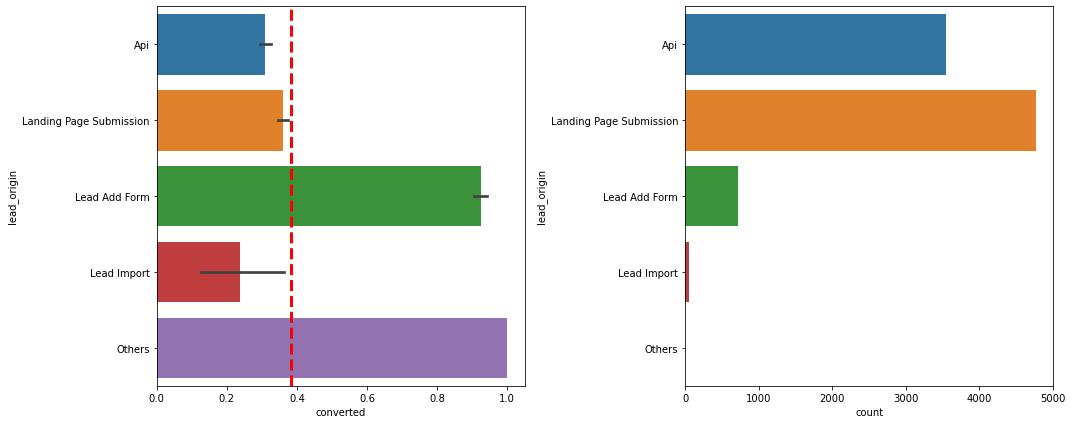

In [420]:
analyze_cat_col_with_target('lead_origin',10)

In [421]:
#Lead add form is a very good indicator of being converted


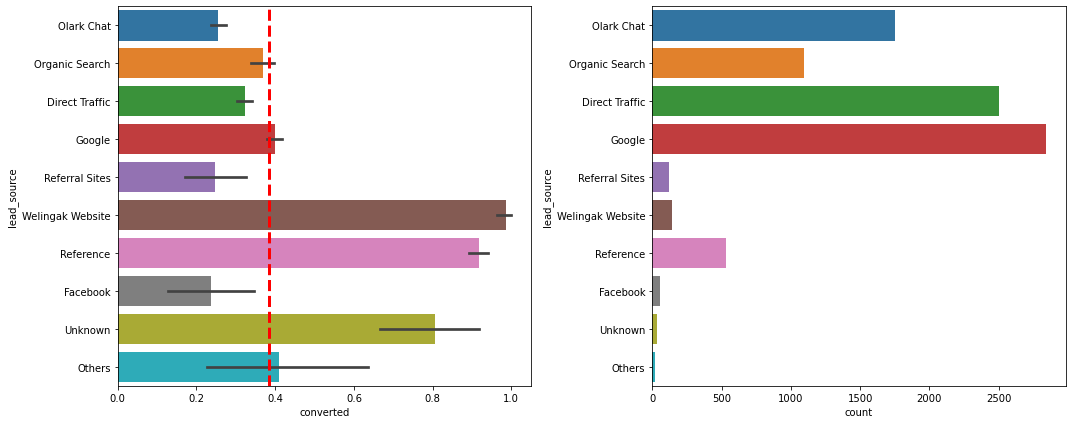

In [422]:
analyze_cat_col_with_target('lead_source',10)

In [423]:
#Google is performing slightly better than average
#Referrals is a good indicator
#Wellingak website although has low count but still very good indicator

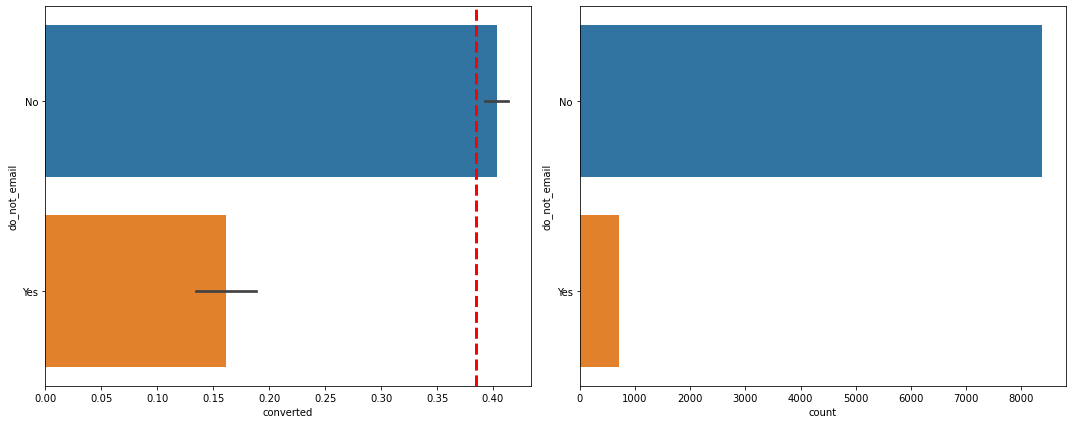

In [424]:
analyze_cat_col_with_target('do_not_email',10)

In [425]:
#Do not email maeked then there is a very less chance of conversion

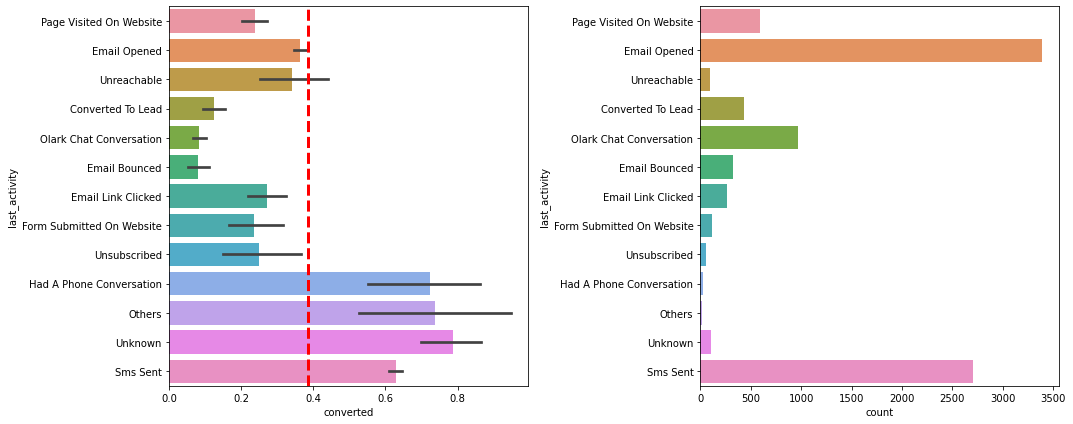

In [426]:
analyze_cat_col_with_target('last_activity',10)

In [427]:
#If the last activity is a sms sent then there is a high chance of conversion

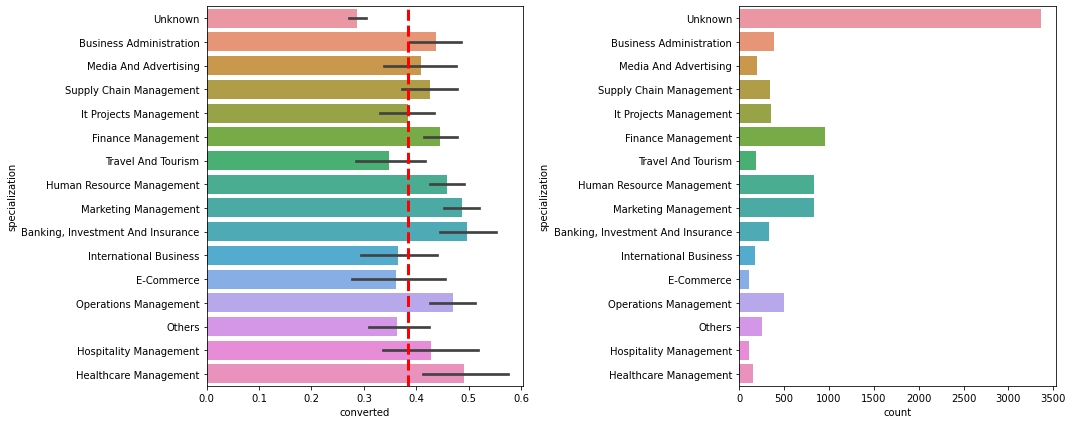

In [428]:
analyze_cat_col_with_target('specialization',100)

In [429]:
#If there is no specialization ie unknown the conversion rate drops suddenly
#All management studies have a good conversion rate

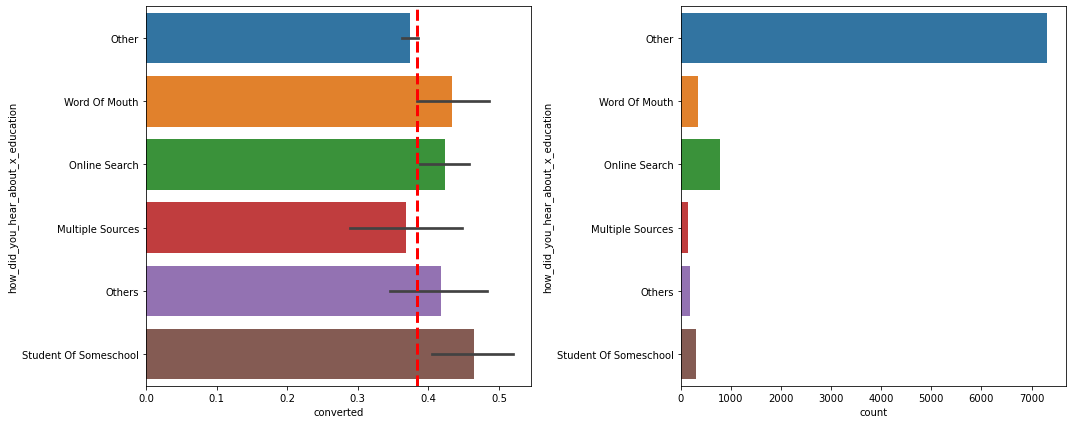

In [430]:
analyze_cat_col_with_target('how_did_you_hear_about_x_education',100)

In [431]:
#Round above the same performance across inputs

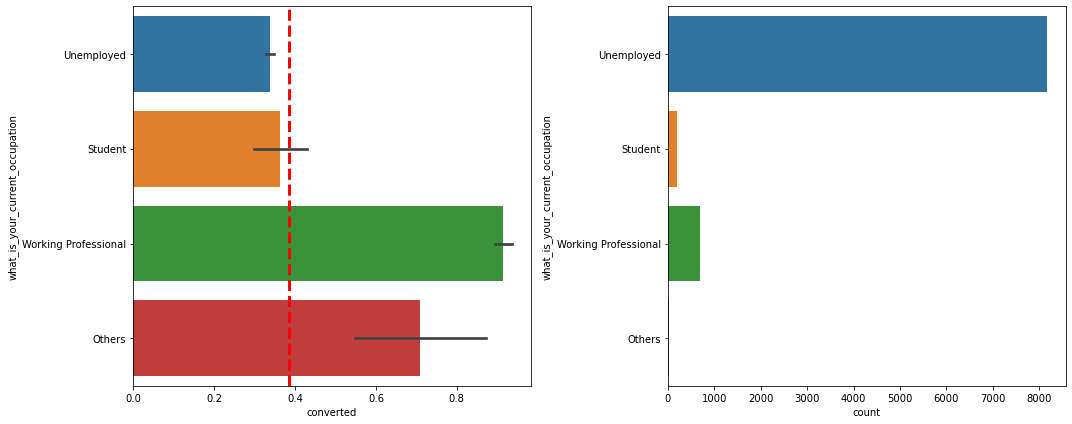

In [432]:
analyze_cat_col_with_target('what_is_your_current_occupation',100)

In [433]:
#Work professionals are a good bracket to target


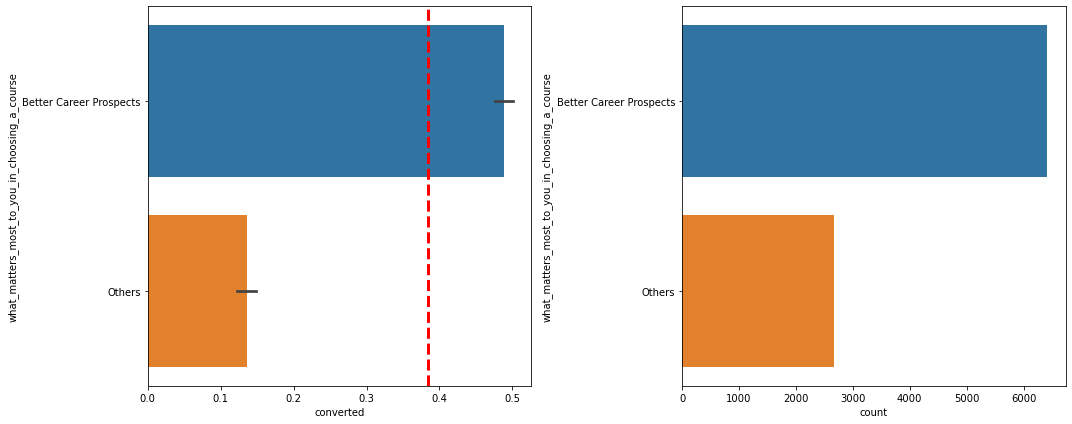

In [434]:
analyze_cat_col_with_target('what_matters_most_to_you_in_choosing_a_course',10)

In [435]:
#Better career prospects or some value is better for conversion

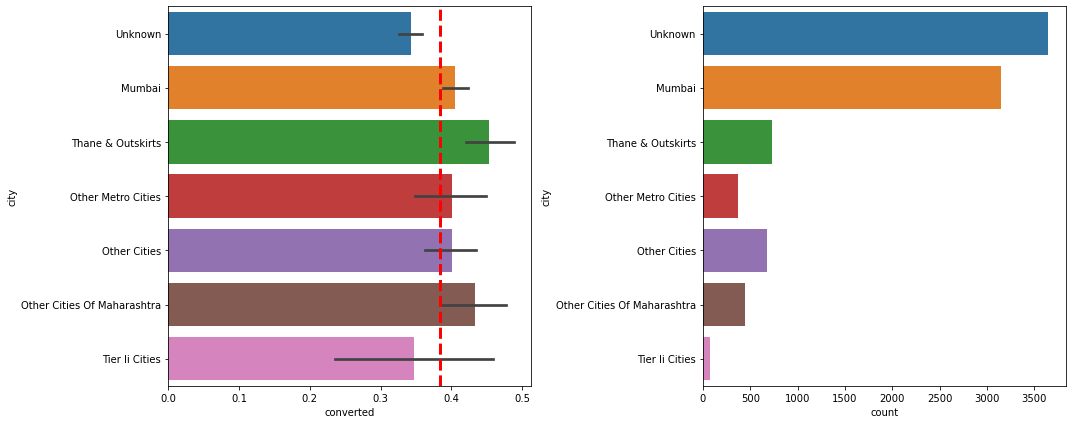

In [436]:
analyze_cat_col_with_target('city',10)

In [437]:
#When city is not mentioned the conversion rate drops

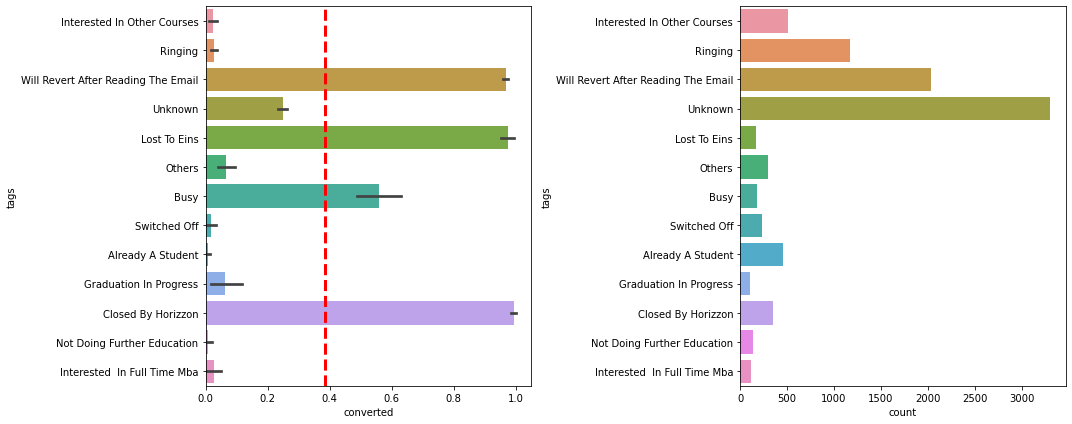

In [438]:
analyze_cat_col_with_target('tags',100)

In [439]:
#will revert after reading the email
#lost to eins
#closed by Horizzon
#have a almost perfect score

In [440]:
df.shape

(9090, 19)

In [441]:
df = df.drop(columns='tags')

In [442]:
df.shape

(9090, 18)

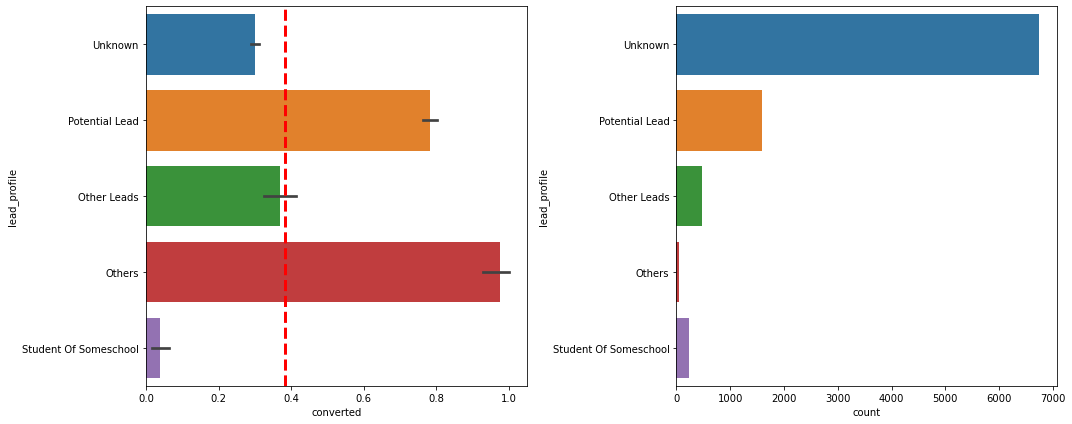

In [443]:
analyze_cat_col_with_target('lead_profile',100)

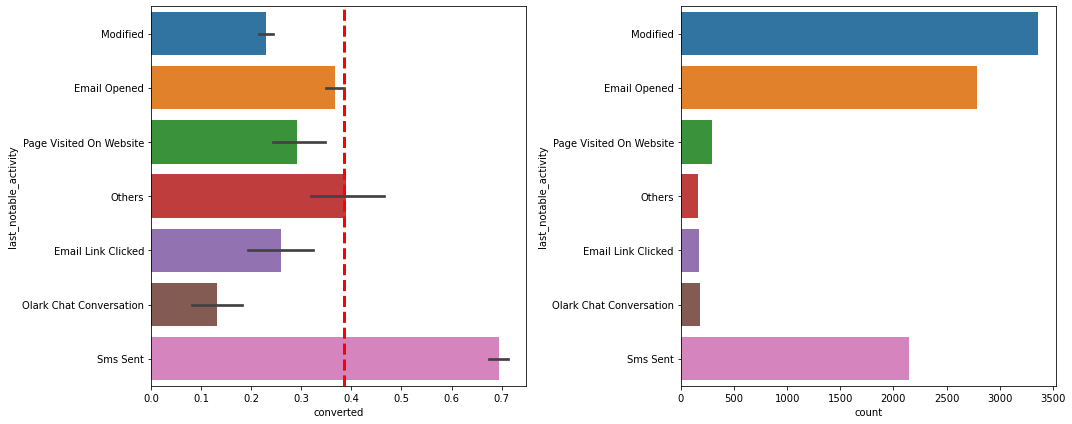

In [444]:
analyze_cat_col_with_target('last_notable_activity',100)

In [445]:
#sms sent is a good indicator

In [446]:
#Numerical Analysis

In [447]:
df = df.convert_dtypes()

In [448]:
df.dtypes
df.shape

(9090, 18)

In [449]:
df.describe([0.99])

,lead_number,converted,totalvisits,total_time_spent_on_website,page_views_per_visit
count,9090.000000,9090.000000,9090.000000,9090.000000,9090.000000
mean,617197.434763,0.384488,3.140924,484.243784,2.262836
std,23392.354280,0.486501,2.881884,547.243973,1.881164
min,579533.000000,0.000000,0.000000,0.000000,0.000000
50%,615557.000000,0.000000,3.000000,246.000000,2.000000
99%,659583.980000,1.000000,13.000000,1840.110000,8.000000
max,660737.000000,1.000000,17.000000,2272.000000,9.000000


<AxesSubplot:xlabel='converted', ylabel='totalvisits'>

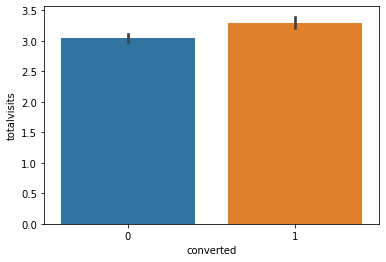

In [450]:
sns.barplot(x=df.converted,y=df.totalvisits)

<AxesSubplot:xlabel='converted', ylabel='total_time_spent_on_website'>

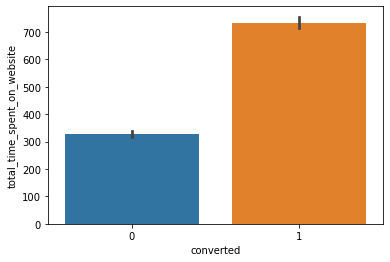

In [451]:
sns.barplot(x=df.converted,y=df.total_time_spent_on_website)

<AxesSubplot:xlabel='converted', ylabel='page_views_per_visit'>

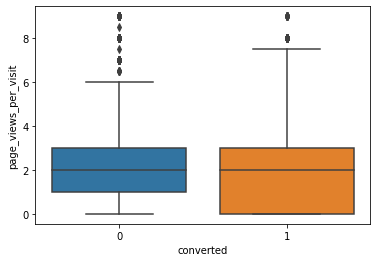

In [452]:
sns.boxplot(x=df.converted,y=df.page_views_per_visit)

<AxesSubplot:>

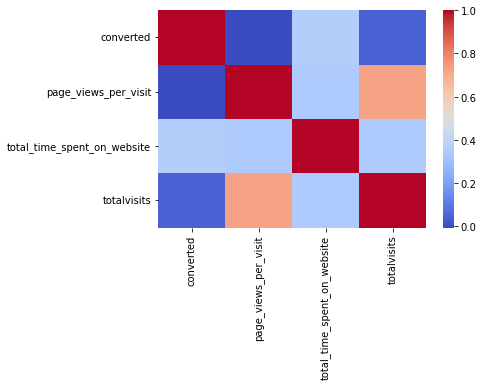

In [453]:
sns.heatmap(df[['converted','page_views_per_visit','total_time_spent_on_website','totalvisits']].corr(),cmap='coolwarm')

In [454]:
df.shape

(9090, 18)

In [455]:
#One Hot encoding data
df = df.drop(columns=['prospect_id','lead_number'])

In [456]:
cat_df =pd.DataFrame()
for column in df.select_dtypes('string').columns:
    cat_df = pd.concat([cat_df,pd.get_dummies(df[column],prefix=column)],axis=1)

In [457]:
cat_df.head()

,lead_origin_Api,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_origin_Quick Add Form,lead_source_Bing,lead_source_Blog,lead_source_Click2Call,lead_source_Direct Traffic,lead_source_Facebook,lead_source_Google,lead_source_Live Chat,lead_source_Nc_Edm,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Pay Per Click Ads,lead_source_Press_Release,lead_source_Reference,lead_source_Referral Sites,lead_source_Social Media,lead_source_Testone,lead_source_Unknown,lead_source_Welearn,lead_source_Welearnblog_Home,lead_source_Welingak Website,lead_source_Youtubechannel,do_not_email_No,do_not_email_Yes,last_activity_Approached Upfront,last_activity_Converted To Lead,last_activity_Email Bounced,last_activity_Email Link Clicked,last_activity_Email Marked Spam,last_activity_Email Opened,last_activity_Email Received,last_activity_Form Submitted On Website,last_activity_Had A Phone Conversation,last_activity_Olark Chat Conversation,last_activity_Page Visited On Website,last_activity_Resubscribed To Emails,last_activity_Sms Sent,last_activity_Unknown,last_activity_Unreachable,last_activity_Unsubscribed,last_activity_View In Browser Link Clicked,last_activity_Visited Booth In Tradeshow,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-Commerce,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_International Business,specialization_It Projects Management,specialization_Marketing Management,specialization_Media And Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural And Agribusiness,specialization_Services Excellence,specialization_Supply Chain Management,specialization_Travel And Tourism,specialization_Unknown,how_did_you_hear_about_x_education_Advertisements,how_did_you_hear_about_x_education_Email,how_did_you_hear_about_x_education_Multiple Sources,how_did_you_hear_about_x_education_Online Search,how_did_you_hear_about_x_education_Other,how_did_you_hear_about_x_education_Sms,how_did_you_hear_about_x_education_Social Media,how_did_you_hear_about_x_education_Student Of Someschool,how_did_you_hear_about_x_education_Word Of Mouth,what_is_your_current_occupation_Businessman,what_is_your_current_occupation_Housewife,what_is_your_current_occupation_Other,what_is_your_current_occupation_Student,what_is_your_current_occupation_Unemployed,what_is_your_current_occupation_Working Professional,what_matters_most_to_you_in_choosing_a_course_Better Career Prospects,what_matters_most_to_you_in_choosing_a_course_Flexibility & Convenience,what_matters_most_to_you_in_choosing_a_course_Other,what_matters_most_to_you_in_choosing_a_course_Others,lead_profile_Dual Specialization Student,lead_profile_Lateral Student,lead_profile_Other Leads,lead_profile_Potential Lead,lead_profile_Student Of Someschool,lead_profile_Unknown,city_Mumbai,city_Other Cities,city_Other Cities Of Maharashtra,city_Other Metro Cities,city_Thane & Outskirts,city_Tier Ii Cities,city_Unknown,a_free_copy_of_mastering_the_interview_No,a_free_copy_of_mastering_the_interview_Yes,last_notable_activity_Approached Upfront,last_notable_activity_Email Bounced,last_notable_activity_Email Link Clicked,last_notable_activity_Email Marked Spam,last_notable_activity_Email Opened,last_notable_activity_Email Received,last_notable_activity_Form Submitted On Website,last_notable_activity_Had A Phone Conversation,last_notable_activity_Modified,last_notable_activity_Olark Chat Conversation,last_notable_activity_Page Visited On Website,last_notable_activity_Resubscribed To Emails,last_notable_activity_Sms Sent,last_notable_activity_Unreachable,last_notable_activity_Unsubscribed,last_notable_activity_View In Browser Link Clicked
0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0

In [458]:
df.shape

(9090, 16)

In [459]:
cat_df.shape

(9090, 115)

In [460]:
df = df.drop(columns=df.select_dtypes('string').columns)
df=pd.concat([df,cat_df],axis=1)
df.head()

,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,lead_origin_Api,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_origin_Quick Add Form,lead_source_Bing,lead_source_Blog,lead_source_Click2Call,lead_source_Direct Traffic,lead_source_Facebook,lead_source_Google,lead_source_Live Chat,lead_source_Nc_Edm,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Pay Per Click Ads,lead_source_Press_Release,lead_source_Reference,lead_source_Referral Sites,lead_source_Social Media,lead_source_Testone,lead_source_Unknown,lead_source_Welearn,lead_source_Welearnblog_Home,lead_source_Welingak Website,lead_source_Youtubechannel,do_not_email_No,do_not_email_Yes,last_activity_Approached Upfront,last_activity_Converted To Lead,last_activity_Email Bounced,last_activity_Email Link Clicked,last_activity_Email Marked Spam,last_activity_Email Opened,last_activity_Email Received,last_activity_Form Submitted On Website,last_activity_Had A Phone Conversation,last_activity_Olark Chat Conversation,last_activity_Page Visited On Website,last_activity_Resubscribed To Emails,last_activity_Sms Sent,last_activity_Unknown,last_activity_Unreachable,last_activity_Unsubscribed,last_activity_View In Browser Link Clicked,last_activity_Visited Booth In Tradeshow,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-Commerce,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_International Business,specialization_It Projects Management,specialization_Marketing Management,specialization_Media And Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural And Agribusiness,specialization_Services Excellence,specialization_Supply Chain Management,specialization_Travel And Tourism,specialization_Unknown,how_did_you_hear_about_x_education_Advertisements,how_did_you_hear_about_x_education_Email,how_did_you_hear_about_x_education_Multiple Sources,how_did_you_hear_about_x_education_Online Search,how_did_you_hear_about_x_education_Other,how_did_you_hear_about_x_education_Sms,how_did_you_hear_about_x_education_Social Media,how_did_you_hear_about_x_education_Student Of Someschool,how_did_you_hear_about_x_education_Word Of Mouth,what_is_your_current_occupation_Businessman,what_is_your_current_occupation_Housewife,what_is_your_current_occupation_Other,what_is_your_current_occupation_Student,what_is_your_current_occupation_Unemployed,what_is_your_current_occupation_Working Professional,what_matters_most_to_you_in_choosing_a_course_Better Career Prospects,what_matters_most_to_you_in_choosing_a_course_Flexibility & Convenience,what_matters_most_to_you_in_choosing_a_course_Other,what_matters_most_to_you_in_choosing_a_course_Others,lead_profile_Dual Specialization Student,lead_profile_Lateral Student,lead_profile_Other Leads,lead_profile_Potential Lead,lead_profile_Student Of Someschool,lead_profile_Unknown,city_Mumbai,city_Other Cities,city_Other Cities Of Maharashtra,city_Other Metro Cities,city_Thane & Outskirts,city_Tier Ii Cities,city_Unknown,a_free_copy_of_mastering_the_interview_No,a_free_copy_of_mastering_the_interview_Yes,last_notable_activity_Approached Upfront,last_notable_activity_Email Bounced,last_notable_activity_Email Link Clicked,last_notable_activity_Email Marked Spam,last_notable_activity_Email Opened,last_notable_activity_Email Received,last_notable_activity_Form Submitted On Website,last_notable_activity_Had A Phone Conversation,last_notable_activity_Modified,last_notable_activity_Olark Chat Conversation,last_notable_activity_Page Visited On Website,last_notable_activity_Resubscribed To Emails,last_notable_activity_Sms Sent,last_notable_activity_Unreachable,last_notable_activity_Unsubscribed,last_notable_activity_View In Browser Link Clicked
0,0,0,0,0.0,1,0,0,0,0,0,

In [461]:
df.shape

(9090, 119)

In [462]:
#standardising numerical data
from sklearn.preprocessing import StandardScaler
numerical_columns = ['page_views_per_visit','total_time_spent_on_website','totalvisits']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [463]:
#Separating training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns='converted'),df['converted'],train_size=0.8)
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (7272, 118)
X_test:  (1818, 118)
y_train:  (7272,)
y_test:  (1818,)


In [464]:
#RFE

In [465]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [466]:
lr = LogisticRegression(max_iter=500)
rfe = RFE(lr,n_features_to_select=20)
rfe.fit(X_train,y_train.astype('int'))
cols = X_train.columns[rfe.support_]

In [467]:
pd.DataFrame(data=zip(df.columns,rfe.support_))

,0,1
0,converted,False
1,totalvisits,True
2,total_time_spent_on_website,False
3,page_views_per_visit,False
4,lead_origin_Api,False
...,...,...
113,last_notable_activity_Page Visited On Website,False
114,last_notable_activity_Resubscribed To Emails,False
115,last_notable_activity_Sms Sent,True
116,last_notable_activity_Unreachable,False


In [468]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [469]:
cols

Index(['total_time_spent_on_website', 'lead_origin_Lead Add Form',
       'lead_source_Olark Chat', 'lead_source_Welingak Website',
       'do_not_email_Yes', 'last_activity_Approached Upfront',
       'last_activity_Email Bounced', 'last_activity_Olark Chat Conversation',
       'last_activity_Resubscribed To Emails', 'last_activity_Sms Sent',
       'what_is_your_current_occupation_Housewife',
       'what_is_your_current_occupation_Unemployed',
       'what_is_your_current_occupation_Working Professional',
       'what_matters_most_to_you_in_choosing_a_course_Others',
       'lead_profile_Dual Specialization Student',
       'lead_profile_Lateral Student', 'lead_profile_Potential Lead',
       'lead_profile_Student Of Someschool',
       'last_notable_activity_Had A Phone Conversation',
       'last_notable_activity_Unreachable'],
      dtype='object')

In [470]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(cols):
    vif=pd.DataFrame()
    vif['Features'] = X_train[cols].columns
    vif['VIF'] = [variance_inflation_factor(X_train[cols].values,i) for i in range(X_train[cols].shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by="VIF",ascending=False)
    print(vif)

In [471]:
def train_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    logm = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
    res=logm.fit()
    print(res.summary())
    return X_train_sm,res

In [472]:
#Building Model 1 (OLS + VIF)
X_train_sm,res = train_model(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              converted   No. Observations:                 7272
Model:                            GLM   Df Residuals:                     7251
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2791.2
Date:                Tue, 18 Jul 2023   Deviance:                       5582.4
Time:                        21:38:52   Pearson chi2:                 7.80e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [473]:
calculate_vif(cols)

                                             Features   VIF
11         what_is_your_current_occupation_Unemployed  2.78
4                                    do_not_email_Yes  1.80
2                              lead_source_Olark Chat  1.77
6                         last_activity_Email Bounced  1.75
13  what_matters_most_to_you_in_choosing_a_course_...  1.74
9                              last_activity_Sms Sent  1.59
1                           lead_origin_Lead Add Form  1.59
16                        lead_profile_Potential Lead  1.52
7               last_activity_Olark Chat Conversation  1.45
12  what_is_your_current_occupation_Working Profes...  1.36
3                        lead_source_Welingak Website  1.29
0                         total_time_spent_on_website  1.28
17                 lead_profile_Student Of Someschool  1.05
15                       lead_profile_Lateral Student  1.01
10          what_is_your_current_occupation_Housewife  1.01
14           lead_profile_Dual Specializ

In [474]:
cols = cols.drop('last_activity_Approached Upfront',errors='ignore')

In [475]:
#Building Model 2 (OLS + VIF)
X_train_sm,res = train_model(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              converted   No. Observations:                 7272
Model:                            GLM   Df Residuals:                     7252
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2793.6
Date:                Tue, 18 Jul 2023   Deviance:                       5587.1
Time:                        21:38:59   Pearson chi2:                 7.81e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [476]:
calculate_vif(cols)

                                             Features   VIF
10         what_is_your_current_occupation_Unemployed  2.77
4                                    do_not_email_Yes  1.80
2                              lead_source_Olark Chat  1.77
5                         last_activity_Email Bounced  1.75
12  what_matters_most_to_you_in_choosing_a_course_...  1.74
8                              last_activity_Sms Sent  1.59
1                           lead_origin_Lead Add Form  1.59
15                        lead_profile_Potential Lead  1.52
6               last_activity_Olark Chat Conversation  1.45
11  what_is_your_current_occupation_Working Profes...  1.36
3                        lead_source_Welingak Website  1.29
0                         total_time_spent_on_website  1.28
16                 lead_profile_Student Of Someschool  1.05
14                       lead_profile_Lateral Student  1.01
9           what_is_your_current_occupation_Housewife  1.01
13           lead_profile_Dual Specializ

In [477]:
cols = cols.drop('what_is_your_current_occupation_Housewife',errors='ignore')

In [478]:
#Building Model 3 (OLS + VIF)
X_train_sm,res = train_model(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              converted   No. Observations:                 7272
Model:                            GLM   Df Residuals:                     7253
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2797.8
Date:                Tue, 18 Jul 2023   Deviance:                       5595.6
Time:                        21:39:06   Pearson chi2:                 7.84e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [479]:
calculate_vif(cols)

                                             Features   VIF
9          what_is_your_current_occupation_Unemployed  2.77
4                                    do_not_email_Yes  1.80
2                              lead_source_Olark Chat  1.77
5                         last_activity_Email Bounced  1.75
11  what_matters_most_to_you_in_choosing_a_course_...  1.74
8                              last_activity_Sms Sent  1.59
1                           lead_origin_Lead Add Form  1.58
14                        lead_profile_Potential Lead  1.51
6               last_activity_Olark Chat Conversation  1.45
10  what_is_your_current_occupation_Working Profes...  1.36
3                        lead_source_Welingak Website  1.29
0                         total_time_spent_on_website  1.28
15                 lead_profile_Student Of Someschool  1.05
12           lead_profile_Dual Specialization Student  1.01
13                       lead_profile_Lateral Student  1.01
17                  last_notable_activit

In [480]:
cols = cols.drop('last_activity_Resubscribed To Emails',errors='ignore')

In [481]:
#Building Model 4
X_train_sm,res = train_model(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              converted   No. Observations:                 7272
Model:                            GLM   Df Residuals:                     7254
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2799.9
Date:                Tue, 18 Jul 2023   Deviance:                       5599.8
Time:                        21:39:48   Pearson chi2:                 7.84e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [482]:
calculate_vif(cols)

                                             Features   VIF
8          what_is_your_current_occupation_Unemployed  2.77
4                                    do_not_email_Yes  1.80
2                              lead_source_Olark Chat  1.77
5                         last_activity_Email Bounced  1.75
10  what_matters_most_to_you_in_choosing_a_course_...  1.74
7                              last_activity_Sms Sent  1.59
1                           lead_origin_Lead Add Form  1.58
13                        lead_profile_Potential Lead  1.51
6               last_activity_Olark Chat Conversation  1.45
9   what_is_your_current_occupation_Working Profes...  1.36
3                        lead_source_Welingak Website  1.29
0                         total_time_spent_on_website  1.28
14                 lead_profile_Student Of Someschool  1.05
12                       lead_profile_Lateral Student  1.01
11           lead_profile_Dual Specialization Student  1.01
16                  last_notable_activit

In [483]:
cols= cols.drop('lead_profile_Dual Specialization Student',errors='ignore')

In [484]:
#Building Model 5
X_train_sm,res = train_model(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              converted   No. Observations:                 7272
Model:                            GLM   Df Residuals:                     7255
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2810.3
Date:                Tue, 18 Jul 2023   Deviance:                       5620.6
Time:                        21:40:06   Pearson chi2:                 7.88e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [485]:
calculate_vif(cols)

                                             Features   VIF
8          what_is_your_current_occupation_Unemployed  2.77
4                                    do_not_email_Yes  1.80
2                              lead_source_Olark Chat  1.77
5                         last_activity_Email Bounced  1.75
10  what_matters_most_to_you_in_choosing_a_course_...  1.73
7                              last_activity_Sms Sent  1.59
1                           lead_origin_Lead Add Form  1.58
12                        lead_profile_Potential Lead  1.51
6               last_activity_Olark Chat Conversation  1.45
9   what_is_your_current_occupation_Working Profes...  1.35
3                        lead_source_Welingak Website  1.29
0                         total_time_spent_on_website  1.28
13                 lead_profile_Student Of Someschool  1.05
11                       lead_profile_Lateral Student  1.01
15                  last_notable_activity_Unreachable  1.01
14     last_notable_activity_Had A Phone

In [343]:
# cols_copy = cols.copy(deep=True)

In [344]:
# cols_copy = cols_copy.drop('total_time_spent_on_website',errors='ignore')

In [345]:
#Building Model 6
# X_train_sm,res = train_model(cols_copy)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              converted   No. Observations:                 7272
Model:                            GLM   Df Residuals:                     7256
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3283.6
Date:                Tue, 18 Jul 2023   Deviance:                       6567.2
Time:                        20:59:06   Pearson chi2:                 7.76e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [346]:
calculate_vif(cols_copy)

                                             Features   VIF
13      last_notable_activity_Olark Chat Conversation  1.31
2                        lead_source_Welingak Website  1.30
9                  lead_profile_Student Of Someschool  1.04
10           last_notable_activity_Email Link Clicked  1.02
14      last_notable_activity_Page Visited On Website  1.02
7                        lead_profile_Lateral Student  1.01
5               last_activity_Olark Chat Conversation  0.63
8                         lead_profile_Potential Lead  0.27
3                                    do_not_email_Yes  0.18
0                           lead_origin_Lead Add Form  0.13
1                              lead_source_Olark Chat  0.12
6   what_is_your_current_occupation_Working Profes...  0.11
11                 last_notable_activity_Email Opened  0.10
12                     last_notable_activity_Modified  0.08
4                         last_activity_Email Bounced  0.05


In [347]:
# cols_copy = cols_copy.drop('lead_source_Welingak Website',errors='ignore')

In [348]:
#Building Model 7
# X_train_sm,res= train_model(cols_copy)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              converted   No. Observations:                 7272
Model:                            GLM   Df Residuals:                     7257
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3296.6
Date:                Tue, 18 Jul 2023   Deviance:                       6593.3
Time:                        21:00:01   Pearson chi2:                 8.40e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [349]:
# calculate_vif(cols_copy)

                                             Features   VIF
12      last_notable_activity_Olark Chat Conversation  1.31
8                  lead_profile_Student Of Someschool  1.04
9            last_notable_activity_Email Link Clicked  1.02
13      last_notable_activity_Page Visited On Website  1.02
6                        lead_profile_Lateral Student  1.01
4               last_activity_Olark Chat Conversation  0.63
7                         lead_profile_Potential Lead  0.26
2                                    do_not_email_Yes  0.18
1                              lead_source_Olark Chat  0.12
0                           lead_origin_Lead Add Form  0.10
5   what_is_your_current_occupation_Working Profes...  0.10
10                 last_notable_activity_Email Opened  0.10
11                     last_notable_activity_Modified  0.08
3                         last_activity_Email Bounced  0.05


In [350]:
# cols_copy = cols_copy.drop('lead_source_Olark Chat',errors='ignore')

In [351]:
#Building Model 8
# X_train_sm,res = train_model(cols_copy) 

                 Generalized Linear Model Regression Results                  
Dep. Variable:              converted   No. Observations:                 7272
Model:                            GLM   Df Residuals:                     7258
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3297.1
Date:                Tue, 18 Jul 2023   Deviance:                       6594.3
Time:                        21:01:11   Pearson chi2:                 8.37e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [352]:
# calculate_vif(cols_copy)

                                             Features   VIF
11      last_notable_activity_Olark Chat Conversation  1.31
7                  lead_profile_Student Of Someschool  1.04
12      last_notable_activity_Page Visited On Website  1.02
5                        lead_profile_Lateral Student  1.01
8            last_notable_activity_Email Link Clicked  1.00
3               last_activity_Olark Chat Conversation  0.54
6                         lead_profile_Potential Lead  0.26
1                                    do_not_email_Yes  0.18
0                           lead_origin_Lead Add Form  0.10
4   what_is_your_current_occupation_Working Profes...  0.10
9                  last_notable_activity_Email Opened  0.09
10                     last_notable_activity_Modified  0.08
2                         last_activity_Email Bounced  0.05


In [486]:
#Predicting on Train Data
predictions = res.predict(X_train_sm)

In [487]:
y_train_prob = pd.DataFrame(data={'original':y_train.astype('int'),'predicted_prob':predictions})

In [488]:
#Deciding cutoff
from dataclasses import dataclass
@dataclass
class score:
    cutoff:float
    accuracy:int
    specificity:int
    sensitivity:int
    precision:int
        
scores=[]
for i in np.linspace(0,1,21):
    y_train_prob['predicted'] = y_train_prob['predicted_prob'].apply(lambda x: 1 if x>i else 0)
    cm = confusion_matrix(y_train_prob.original,y_train_prob.predicted)
    tp=cm[0,0]
    tn=cm[1,1]
    fp=cm[0,1]
    fn=cm[1,0]
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    sensitivity = (tp)/(tp+fn)
    specificity = (tn)/(tn+fp)
    precision = (tp)/(tp+fp)
    scores.append(score(i,accuracy,specificity,sensitivity,precision))
scores_df=pd.DataFrame(scores)

In [489]:
scores_df

,cutoff,accuracy,specificity,sensitivity,precision
0,0.00,0.381601,0.381601,NaN,0.000000
1,0.05,0.548267,0.457542,0.978673,0.275517
2,0.10,0.643977,0.517871,0.961315,0.442072
3,0.15,0.747937,0.609637,0.947581,0.627085
4,0.20,0.777915,0.645218,0.939597,0.684901
5,0.25,0.789879,0.663520,0.929170,0.714699
6,0.30,0.810094,0.708808,0.896035,0.783856
7,0.35,0.817382,0.737759,0.874675,0.822548
8,0.40,0.821920,0.759467,0.862217,0.847454
9,0.45,0.827283,0.784777,0.851900,0.872359


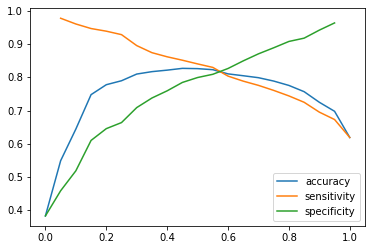

In [490]:
#Accuracy-Sensitivity-Specificity Curve
plt.plot(scores_df.cutoff,scores_df.accuracy,label='accuracy')
plt.plot(scores_df.cutoff,scores_df.sensitivity,label='sensitivity')
plt.plot(scores_df.cutoff,scores_df.specificity,label='specificity')
plt.legend()

In [491]:
#Train Data Results
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res = logm1.fit()

predictions = res.predict(X_train_sm)
y_train_prob = pd.DataFrame(data={'original':y_train.astype('int'),'predicted_prob':predictions})
y_train_prob['predicted'] = y_train_prob['predicted_prob'].apply(lambda x: 1 if x>0.55 else 0)

cm = confusion_matrix(y_pred=y_train_prob.predicted, y_true=y_train_prob.original)
tp = cm[0,0]
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]
accuracy = (tp+tn)/(tp+tn+fp+fn)
sensitivity = (tp)/(tp+fn)
specificity = (tn)/(tn+fp)
precision = (tp)/(tp+fp)

print("Accuracy : ", accuracy)
print("Sensitivity : ", sensitivity)
print("Specificity : ",specificity)
print("Precision : ",precision)

Accuracy :  0.8232948294829483
Sensitivity :  0.8301809210526315
Specificity :  0.8093853820598007
Precision :  0.8979319546364243


In [492]:
#ROC Curve
fpr,tpr,thresholds = metrics.roc_curve(y_train_prob.original,y_train_prob.predicted_prob,drop_intermediate=False)

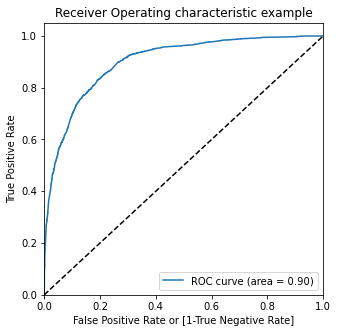

In [493]:
def draw_roc(actual,probs):
    fpr,tpr,thresholds = metrics.roc_curve(actual,probs,drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)'%auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate or [1-True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    return None

draw_roc(y_train_prob.original,y_train_prob.predicted_prob)

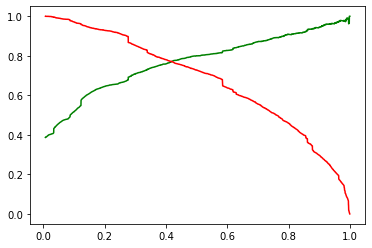

In [494]:
#Predicting Recall curve
from sklearn.metrics import precision_recall_curve
p,r,thresholds = precision_recall_curve(y_train_prob.original,y_train_prob.predicted_prob)

plt.plot(thresholds,p[:-1],"g-")
plt.plot(thresholds,r[:-1],"r-")
plt.show()

In [495]:
#Predicting on Test Data
X_test_sm = sm.add_constant(X_test)
test_predictions = res.predict(X_test_sm[X_train_sm.columns])

In [496]:
y_test = pd.DataFrame(zip(y_test,test_predictions),columns=['y_test','y_test_prob'])

In [497]:
y_test['predicted'] = y_test['y_test_prob'].apply(lambda x:1 if x>0.6 else 0)

In [498]:
cm  = confusion_matrix(y_pred=y_test.predicted,y_true=y_test.y_test)
tp = cm[0,0]
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]
accuracy = (tp+tn)/(tp+tn+fp+fn)
sensitivity = (tp)/(tp+fn)
specificity = (tn)/(tn+fp)
precision = (tp)/(tp+fp)

print("Accuracy : ", accuracy)
print("Sensitivity : ", sensitivity)
print("Specificity : ",specificity)
print("Precision : ",precision)

Accuracy :  0.8195819581958196
Sensitivity :  0.8055555555555556
Specificity :  0.8512544802867383
Precision :  0.924408014571949


In [499]:
column_importance = pd.DataFrame(res.params).reset_index().rename(columns={'index':'column_name',0:'importance'})

column_importance['abs_importance'] = np.abs(column_importance.importance)
column_importance.sort_values('abs_importance')

,column_name,importance,abs_importance
0,const,-0.579451,0.579451
9,what_is_your_current_occupation_Unemployed,-0.884372,0.884372
11,what_matters_most_to_you_in_choosing_a_course_...,-1.008160,1.008160
5,do_not_email_Yes,-1.017487,1.017487
1,total_time_spent_on_website,1.097603,1.097603
6,last_activity_Email Bounced,-1.120030,1.120030
10,what_is_your_current_occupation_Working Profes...,1.271159,1.271159
8,last_activity_Sms Sent,1.299907,1.299907
7,last_activity_Olark Chat Conversation,-1.392335,1.392335
13,lead_profile_Potential Lead,1.443096,1.443096


In [ ]:
#Conclusion

#Train Data Score:
#Accuracy : 82%
#Sensitivity(Out of all the converted users, how many we were able to identify): 83%
#Specificity(Out of all the non converted users, how many we were able to identify): 80%

#Test Data Score:
#Accuracy : 81%
#Sensitivity(Out of all the converted users, how many we were able to identify): 80%
#Specificity(Out of all the non converted users, how many we were able to identify): 85%